In [1]:
from statsmodels.graphics.tsaplots import plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error 
from tqdm import tqdm_notebook 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from itertools import product 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline 
plt.rcParams['figure.figsize'] = [10, 7.5]

In [2]:
# read in data file 
data = pd.read_csv('jj.csv') 
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
# Task 1: Read in the Johnson & Johnson sales data and plot it
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
jj_data = pd.read_csv("jj.csv")

# Display the first few rows
jj_data.head()


,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


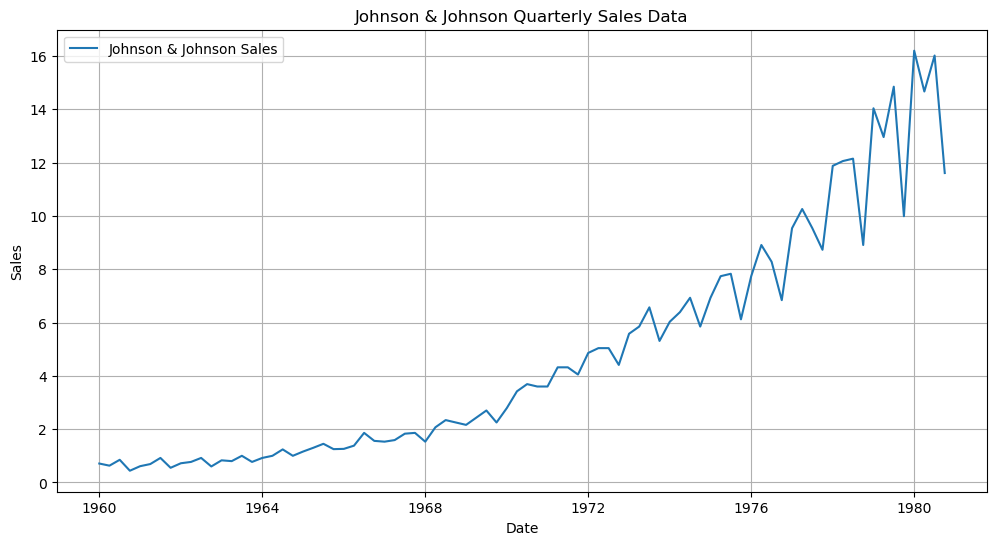

In [5]:
# Convert the 'date' column to datetime and set as index
jj_data['date'] = pd.to_datetime(jj_data['date'])
jj_data.set_index('date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(jj_data['data'], label='Johnson & Johnson Sales')
plt.title("Johnson & Johnson Quarterly Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


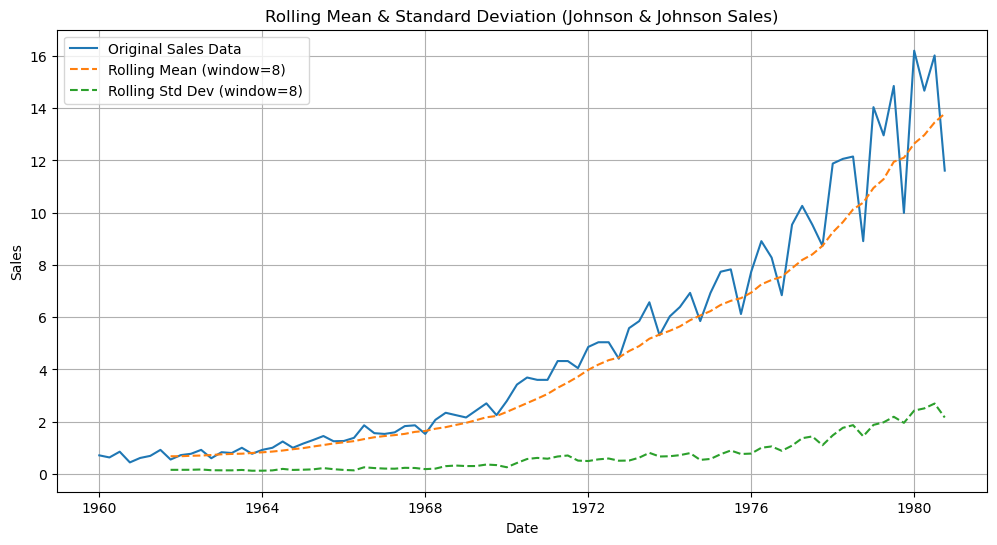

In [6]:
# Task 2: Investigate data properties — trend, variance, seasonality

# Rolling mean and standard deviation
rolling_mean = jj_data['data'].rolling(window=8).mean()
rolling_std = jj_data['data'].rolling(window=8).std()

# Plot original series with rolling stats
plt.figure(figsize=(12, 6))
plt.plot(jj_data['data'], label='Original Sales Data')
plt.plot(rolling_mean, label='Rolling Mean (window=8)', linestyle='--')
plt.plot(rolling_std, label='Rolling Std Dev (window=8)', linestyle='--')
plt.title("Rolling Mean & Standard Deviation (Johnson & Johnson Sales)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


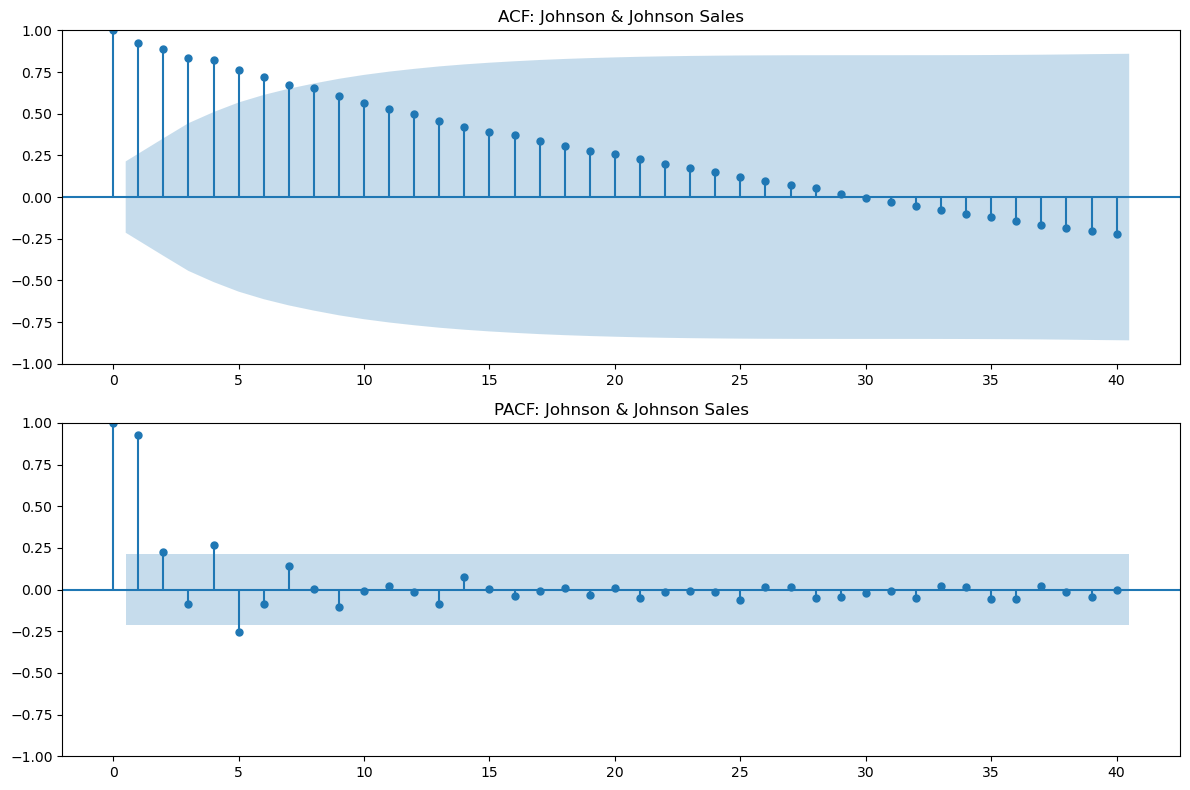

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Task 3: Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(jj_data['data'], lags=40, ax=axes[0])
axes[0].set_title("ACF: Johnson & Johnson Sales")

plot_pacf(jj_data['data'], lags=40, ax=axes[1])
axes[1].set_title("PACF: Johnson & Johnson Sales")

plt.tight_layout()
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

# Task 4: Perform Augmented Dickey-Fuller test
adf_result = adfuller(jj_data['data'])

# Display the results in a readable format
adf_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Lags Used': adf_result[2],
    'Number of Observations Used': adf_result[3],
    'Critical Values': adf_result[4],
}
adf_output


{'ADF Statistic': 2.7420165734574735,
 'p-value': 1.0,
 'Lags Used': 11,
 'Number of Observations Used': 72,
 'Critical Values': {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677}}

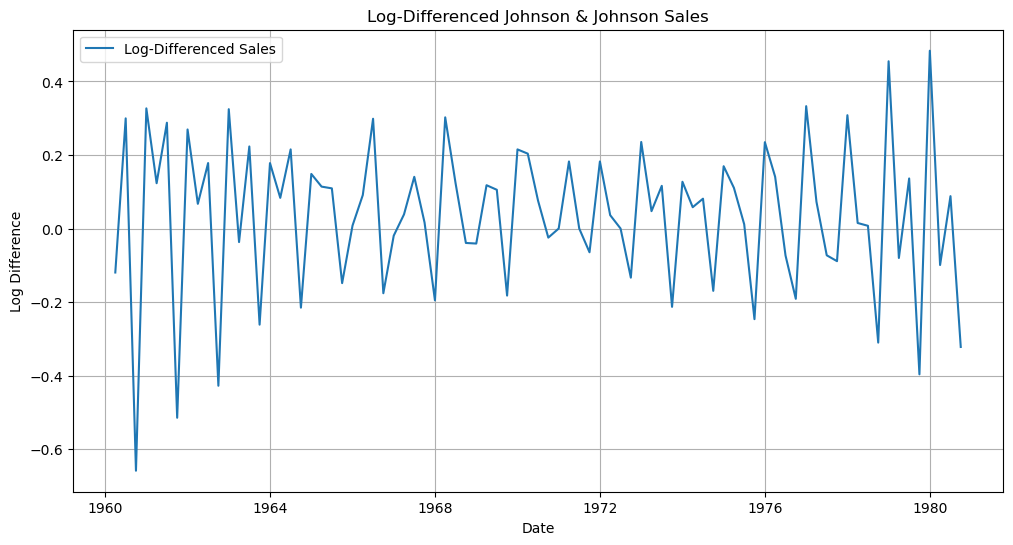

{'ADF Statistic': -4.317043945811843,
 'p-value': 0.00041497314044405543,
 'Lags Used': 5,
 'Number of Observations Used': 77,
 'Critical Values': {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873}}

In [9]:
import numpy as np

# Task 5: Make the series stationary using log transformation and differencing
jj_data['log_data'] = np.log(jj_data['data'])
jj_data['log_diff'] = jj_data['log_data'].diff()

# Drop the first NA value from differencing
log_diff_series = jj_data['log_diff'].dropna()

# Plot the transformed series
plt.figure(figsize=(12, 6))
plt.plot(log_diff_series, label='Log-Differenced Sales')
plt.title("Log-Differenced Johnson & Johnson Sales")
plt.xlabel("Date")
plt.ylabel("Log Difference")
plt.legend()
plt.grid(True)
plt.show()

# Re-run the ADF test on transformed series
adf_log_diff_result = adfuller(log_diff_series)
adf_log_diff_output = {
    'ADF Statistic': adf_log_diff_result[0],
    'p-value': adf_log_diff_result[1],
    'Lags Used': adf_log_diff_result[2],
    'Number of Observations Used': adf_log_diff_result[3],
    'Critical Values': adf_log_diff_result[4],
}
adf_log_diff_output


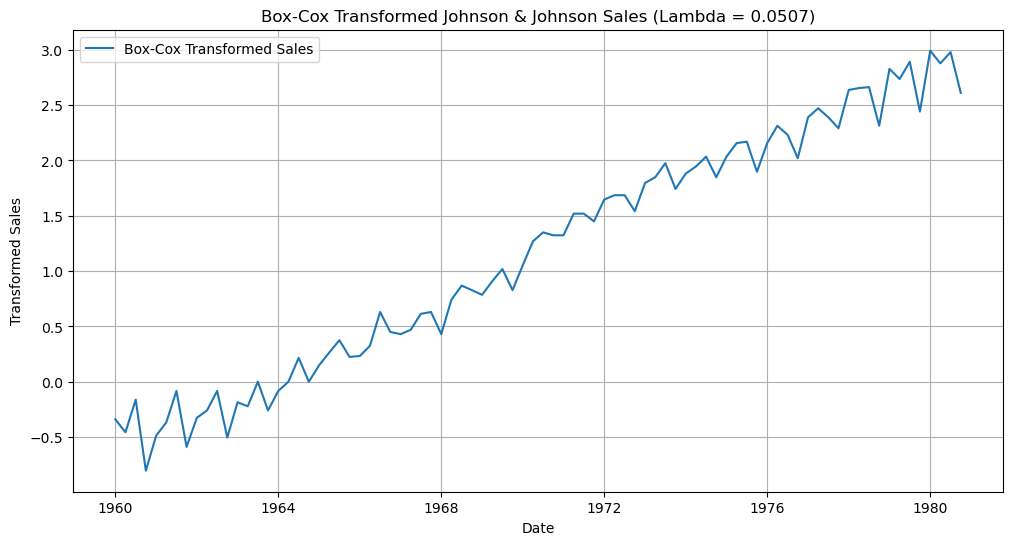

{'ADF Statistic': -4.381473537562139,
 'p-value': 0.00032006197682744533,
 'Lags Used': 5,
 'Number of Observations Used': 77,
 'Critical Values': {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 'Lambda': 0.05071029569161342}

In [10]:
from scipy.stats import boxcox

# Task 5a (Bonus): Apply Box-Cox transformation
# The Box-Cox transform requires strictly positive values, which 'data' satisfies
jj_data['boxcox_data'], lambda_bc = boxcox(jj_data['data'])

# Plot the Box-Cox transformed data
plt.figure(figsize=(12, 6))
plt.plot(jj_data['boxcox_data'], label='Box-Cox Transformed Sales')
plt.title(f"Box-Cox Transformed Johnson & Johnson Sales (Lambda = {lambda_bc:.4f})")
plt.xlabel("Date")
plt.ylabel("Transformed Sales")
plt.legend()
plt.grid(True)
plt.show()

# Also differencing the Box-Cox transformed data
jj_data['boxcox_diff'] = jj_data['boxcox_data'].diff().dropna()

# Run ADF test on Box-Cox differenced series
adf_boxcox_diff_result = adfuller(jj_data['boxcox_diff'].dropna())
adf_boxcox_output = {
    'ADF Statistic': adf_boxcox_diff_result[0],
    'p-value': adf_boxcox_diff_result[1],
    'Lags Used': adf_boxcox_diff_result[2],
    'Number of Observations Used': adf_boxcox_diff_result[3],
    'Critical Values': adf_boxcox_diff_result[4],
    'Lambda': lambda_bc
}
adf_boxcox_output


In [12]:
!pip install pmdarima


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/02/4e/5ac0b5b9a239cd3fdae187dda8ff06b0b812f671e2501bf253712278f0ac/Cython-3.0.12-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/614.7 kB 991.0 kB/s eta 0:00:01
   ----------------------------- ---------- 450.6/614.7 kB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------ --------------------------------- 0.4/2.8 MB 8.7 MB/s eta 0:00:01
   ------------ -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [13]:
import pmdarima as pm

auto_model = pm.auto_arima(jj_data['data'],
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           d=1,
                           seasonal=False,
                           stepwise=True,
                           trace=True,
                           suppress_warnings=True,
                           error_action='ignore')

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=297.285, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=264.953, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.333, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=295.995, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=251.412, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=252.748, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=238.454, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=229.503, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=259.465, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=228.486, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=240.020, Time=0.13 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 se

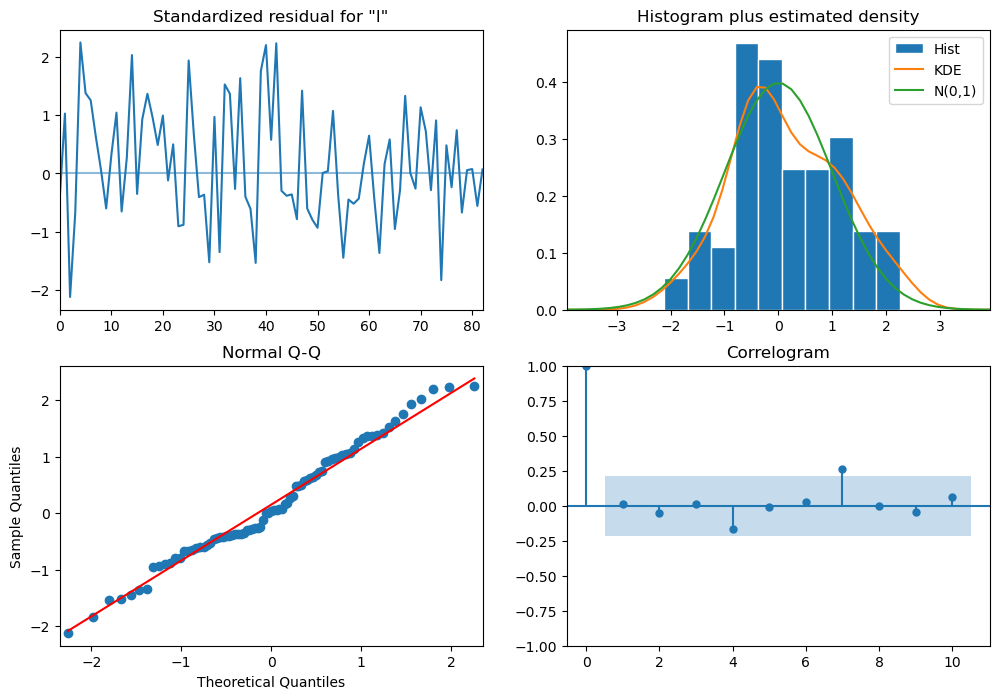

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               log_data   No. Observations:                   84
Model:                 ARIMA(4, 1, 3)   Log Likelihood                  80.100
Date:                Fri, 11 Apr 2025   AIC                           -144.199
Time:                        00:19:20   BIC                           -124.849
Sample:                             0   HQIC                          -136.425
                                 - 84                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1        -3.5e-05      0.060     -0.001      1.000      -0.117       0.117
ar.L2          0.0139      0.049      0.280      0.779      -0.083       0.111
ar.L3          0.0278      0.048      0.577      0.564      -0.067       0.122
ar.L4          0.9380      0.038     24.931      0.000       0.864       1.012
ma.L1         -0.6629      0.143     -4.642      0.000      -0.943      -0.383
ma.L2          0.1076      0.133      0.807      0.420      -0.154       0.369
ma.L3         -0.2979      0.128     -2.320      0.020      -0.550      -0.046
sigma2         0.0077      0.001      5.440      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.93   Prob(JB):                         0.51
Heteroskedasticity (H):               0.50   Skew:                             0.17
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
# Task 7: Fit the best model (ARIMA(4,1,3) on log-transformed data) and inspect summary

from statsmodels.tsa.arima.model import ARIMA

final_model = ARIMA(jj_data['log_data'], order=(4, 1, 3))
final_result = final_model.fit()

# Show summary
summary = final_result.summary()

# Plot residual diagnostics
final_result.plot_diagnostics(figsize=(12, 8))
plt.show()

summary


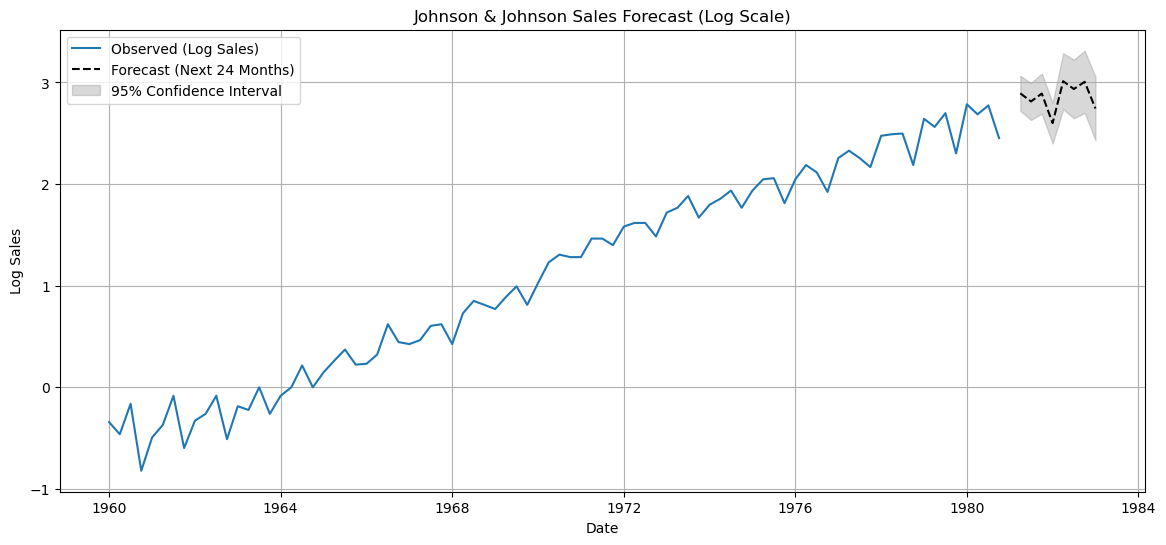

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fit the model again (if not already done)
model = ARIMA(jj_data['log_data'], order=(4, 1, 3))
result = model.fit()

# Forecast next 8 quarters (24 months)
forecast_result = result.get_forecast(steps=8)
forecast_mean = forecast_result.predicted_mean
forecast_ci = forecast_result.conf_int()

# Build datetime index for the forecast period
last_date = jj_data.index[-1]
forecast_index = pd.date_range(start=last_date, periods=9, freq='Q')[1:]

# Convert to float arrays
forecast_mean_vals = forecast_mean.values.astype('float64')
forecast_lower_vals = forecast_ci.iloc[:, 0].values.astype('float64')
forecast_upper_vals = forecast_ci.iloc[:, 1].values.astype('float64')

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(jj_data['log_data'], label='Observed (Log Sales)')
plt.plot(forecast_index, forecast_mean_vals, label='Forecast (Next 24 Months)', linestyle='--', color='black')
plt.fill_between(forecast_index, forecast_lower_vals, forecast_upper_vals,
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("Johnson & Johnson Sales Forecast (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Log Sales")
plt.legend()
plt.grid(True)
plt.show()


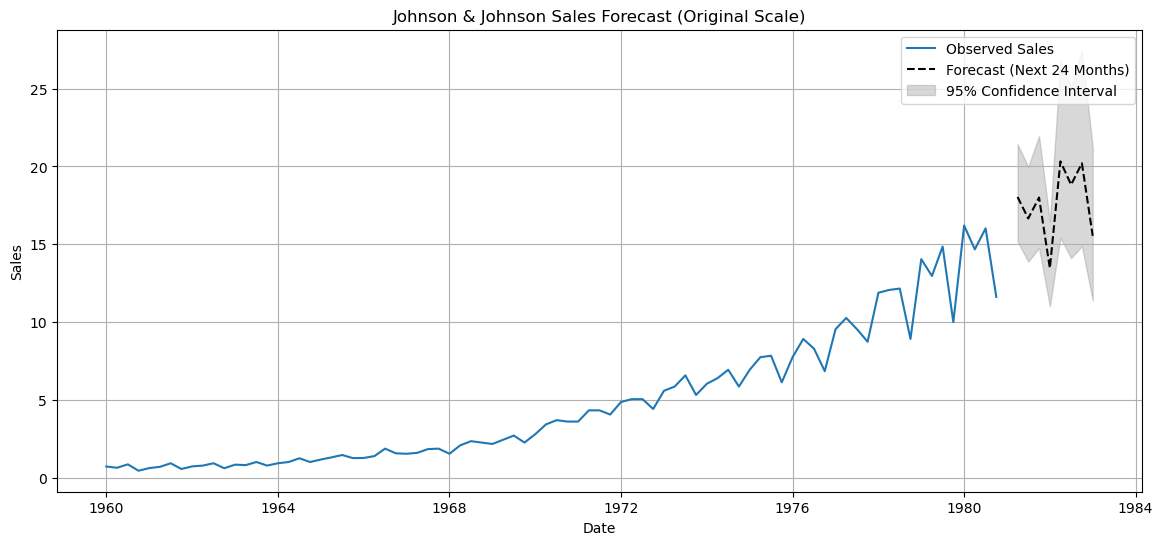

In [20]:
# Task 9: Convert forecast and confidence intervals back to original scale using exp()

# Back-transform from log to original scale
forecast_original = np.exp(forecast_mean_vals)
lower_original = np.exp(forecast_lower_vals)
upper_original = np.exp(forecast_upper_vals)

# Plot original scale forecast
plt.figure(figsize=(14, 6))
plt.plot(jj_data['data'], label='Observed Sales')
plt.plot(forecast_index, forecast_original, label='Forecast (Next 24 Months)', linestyle='--', color='black')
plt.fill_between(forecast_index,
                 lower_original,
                 upper_original,
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("Johnson & Johnson Sales Forecast (Original Scale)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


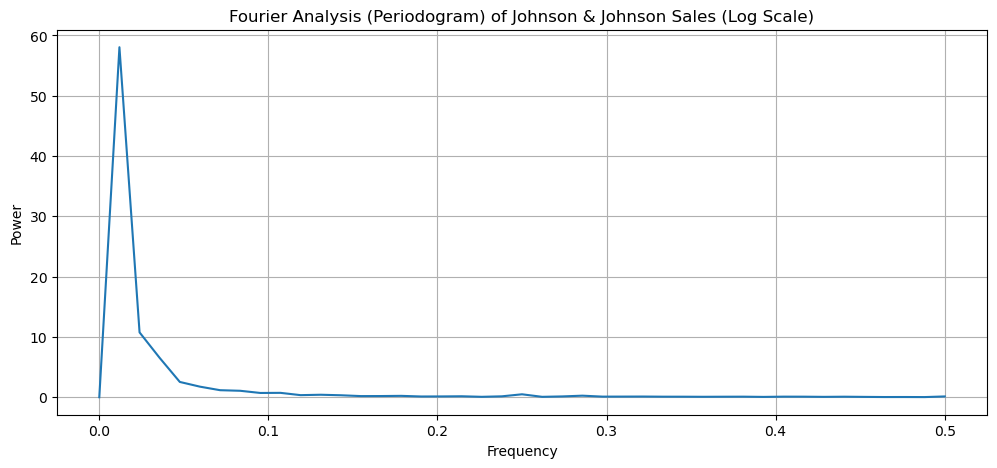

In [21]:
from scipy.signal import periodogram

# Task 10: Fourier (Spectral) Analysis using Periodogram
# Use original log-transformed series for frequency analysis
log_series = jj_data['log_data'].dropna()

# Calculate power spectral density
frequencies, power = periodogram(log_series)

# Plot the periodogram
plt.figure(figsize=(12, 5))
plt.plot(frequencies, power)
plt.title("Fourier Analysis (Periodogram) of Johnson & Johnson Sales (Log Scale)")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()


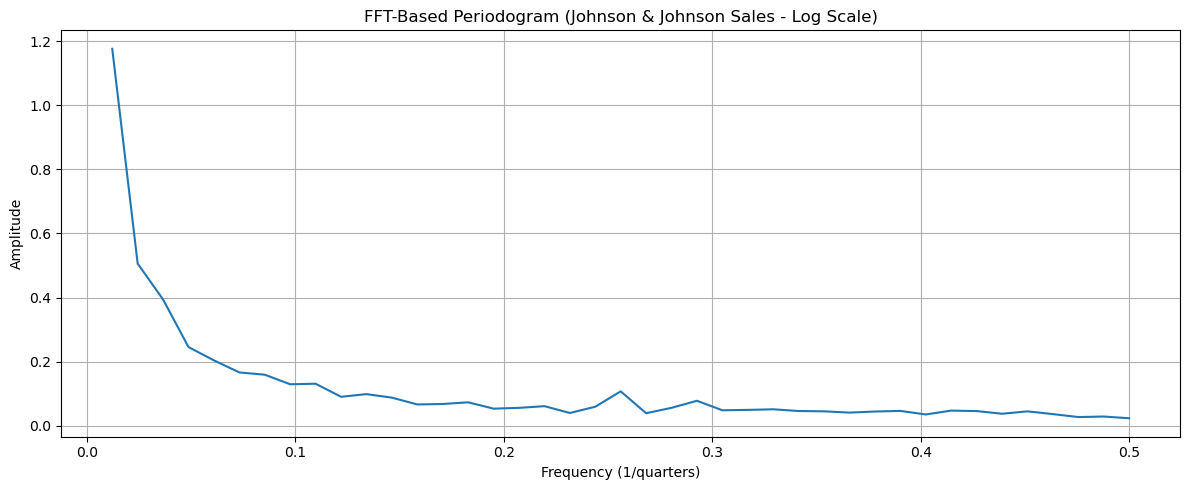

In [25]:
from scipy.fftpack import fft

# Use the log-transformed sales series
log_sales_values = jj_data['log_data'].dropna().values

# Number of data points
N = len(log_sales_values)

# Sample spacing (approx quarterly = 1 year / 4 = 0.25 per sample)
T = 1  # assume 1 unit time between quarters for simplicity

# Create FFT of the signal
yf = fft(log_sales_values)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# Compute power (periodogram) — magnitude of FFT
periodogram = 2.0/N * np.abs(yf[1:N//2])  # skipping the zero frequency

# Plot the result
plt.figure(figsize=(12, 5))
plt.plot(xf[1:], periodogram, linewidth=1.5)
plt.title("FFT-Based Periodogram (Johnson & Johnson Sales - Log Scale)")
plt.xlabel("Frequency (1/quarters)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Step 1: Prepare the log-transformed series
log_sales = jj_data['log_data'].dropna().values.reshape(-1, 1)

# Normalize the log-transformed data to [0, 1]
scaler = MinMaxScaler()
log_sales_scaled = scaler.fit_transform(log_sales)

# Function to create lagged input/output pairs for supervised learning
def create_lagged_dataset(series, look_back=3):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i + look_back].flatten())
        y.append(series[i + look_back][0])
    return np.array(X), np.array(y)

# Use a look-back window of 3 time steps
look_back = 3
X, y = create_lagged_dataset(log_sales_scaled, look_back)

# Split into train and test sets (80% train, 20% test)
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

X.shape, y.shape, X_train.shape, X_test.shape


((81, 3), (81,), (64, 3), (17, 3))

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Define and train MLP model
mlp_model = MLPRegressor(hidden_layer_sizes=(100,),  # 1 hidden layer with 100 neurons
                         activation='relu',
                         solver='adam',
                         max_iter=1000,
                         random_state=42)

mlp_model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred_scaled = mlp_model.predict(X_test)

# Inverse transform predictions and actuals
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Compute RMSE
mlp_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mlp_rmse


0.2311178234659393

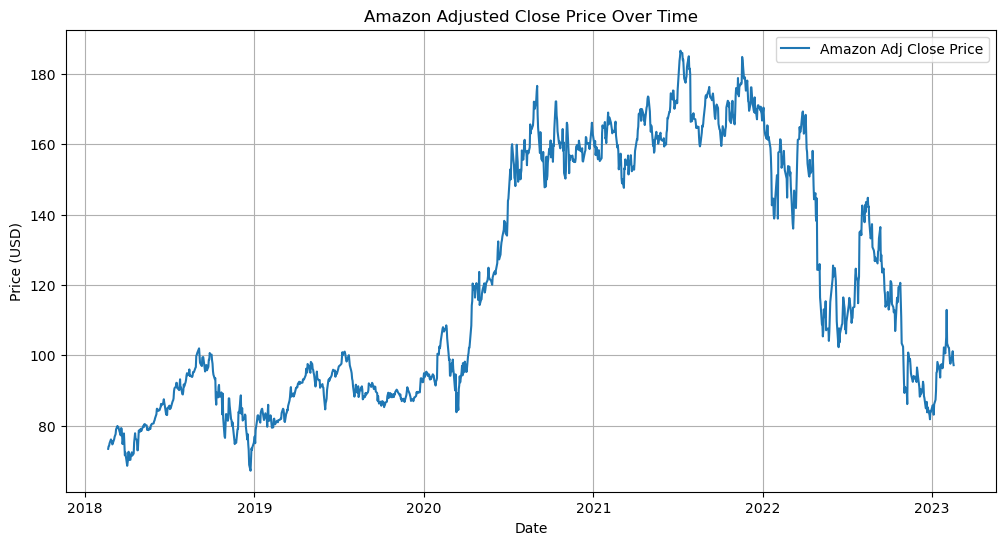

In [26]:
# Task 1: Read and plot Amazon stock data
amzn_data = pd.read_csv("AMZN.csv")

# Convert 'Date' column to datetime and set as index
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_data.set_index('Date', inplace=True)

# Plot Adjusted Close prices
plt.figure(figsize=(12, 6))
plt.plot(amzn_data['Adj Close'], label='Amazon Adj Close Price')
plt.title("Amazon Adjusted Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


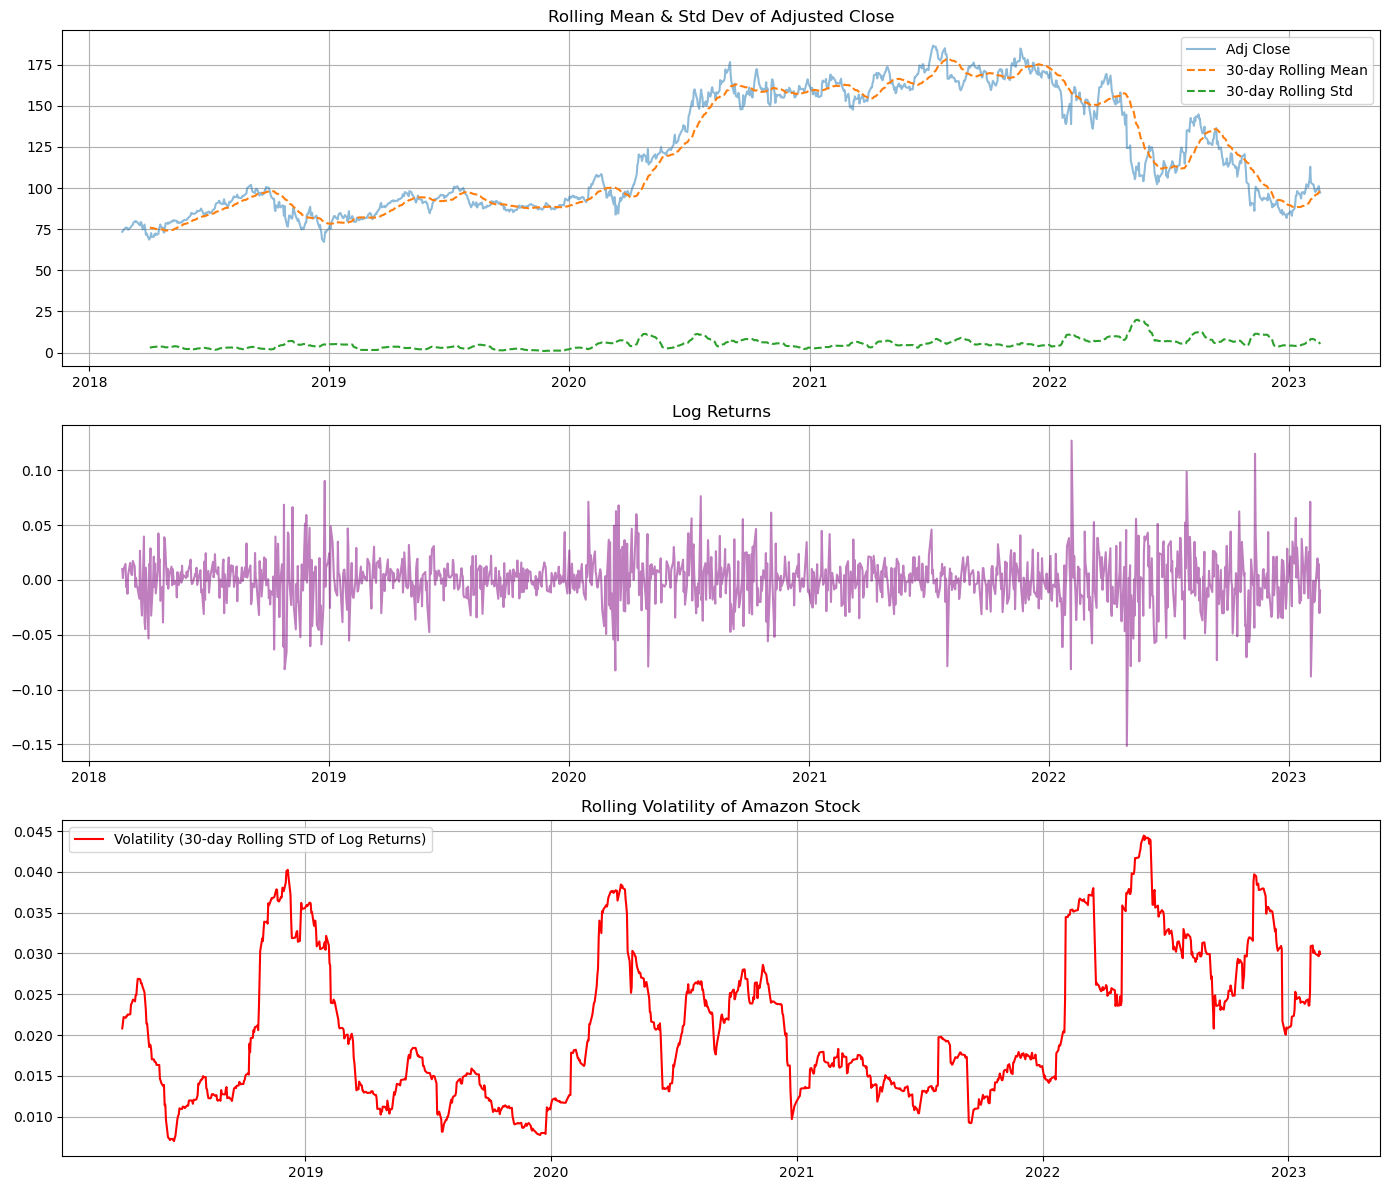

,Open,High,Low,Close,Adj Close,Volume,Returns,Log Returns
Open,1.000000,0.999203,0.999038,0.998041,0.998041,-0.244839,-0.019125,-0.017983
High,0.999203,1.000000,0.998815,0.999072,0.999072,-0.233462,0.000772,0.001573
Low,0.999038,0.998815,1.000000,0.999110,0.999110,-0.260163,0.004500,0.005975
Close,0.998041,0.999072,0.999110,1.000000,1.000000,-0.247028,0.027218,0.028359
Adj Close,0.998041,0.999072,0.999110,1.000000,1.000000,-0.247028,0.027218,0.028359
Volume,-0.244839,-0.233462,-0.260163,-0.247028,-0.247028,1.000000,-0.048136,-0.062329
Returns,-0.019125,0.000772,0.004500,0.027218,0.027218,-0.048136,1.000000,0.999607
Log Returns,-0.017983,0.001573,0.005975,0.028359,0.028359,-0.062329,0.999607,1.000000


In [27]:
# Task 2: Extended exploration of Amazon data properties

# 1. Rolling mean and std of Adjusted Close
rolling_mean = amzn_data['Adj Close'].rolling(window=30).mean()
rolling_std = amzn_data['Adj Close'].rolling(window=30).std()

# 2. Daily returns and log returns
amzn_data['Returns'] = amzn_data['Adj Close'].pct_change()
amzn_data['Log Returns'] = np.log(amzn_data['Adj Close'] / amzn_data['Adj Close'].shift(1))

# 3. Volatility (rolling std of log returns)
volatility = amzn_data['Log Returns'].rolling(window=30).std()

# 4. Correlation matrix of numerical columns
correlation_matrix = amzn_data.corr()

# Plotting all together
fig, axs = plt.subplots(3, 1, figsize=(14, 12))

# Plot rolling mean and std
axs[0].plot(amzn_data['Adj Close'], label='Adj Close', alpha=0.5)
axs[0].plot(rolling_mean, label='30-day Rolling Mean', linestyle='--')
axs[0].plot(rolling_std, label='30-day Rolling Std', linestyle='--')
axs[0].set_title('Rolling Mean & Std Dev of Adjusted Close')
axs[0].legend()
axs[0].grid(True)

# Plot returns and volatility
axs[1].plot(amzn_data['Log Returns'], label='Log Returns', color='purple', alpha=0.5)
axs[1].set_title('Log Returns')
axs[1].grid(True)

axs[2].plot(volatility, label='Volatility (30-day Rolling STD of Log Returns)', color='red')
axs[2].set_title('Rolling Volatility of Amazon Stock')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Display correlation matrix
correlation_matrix


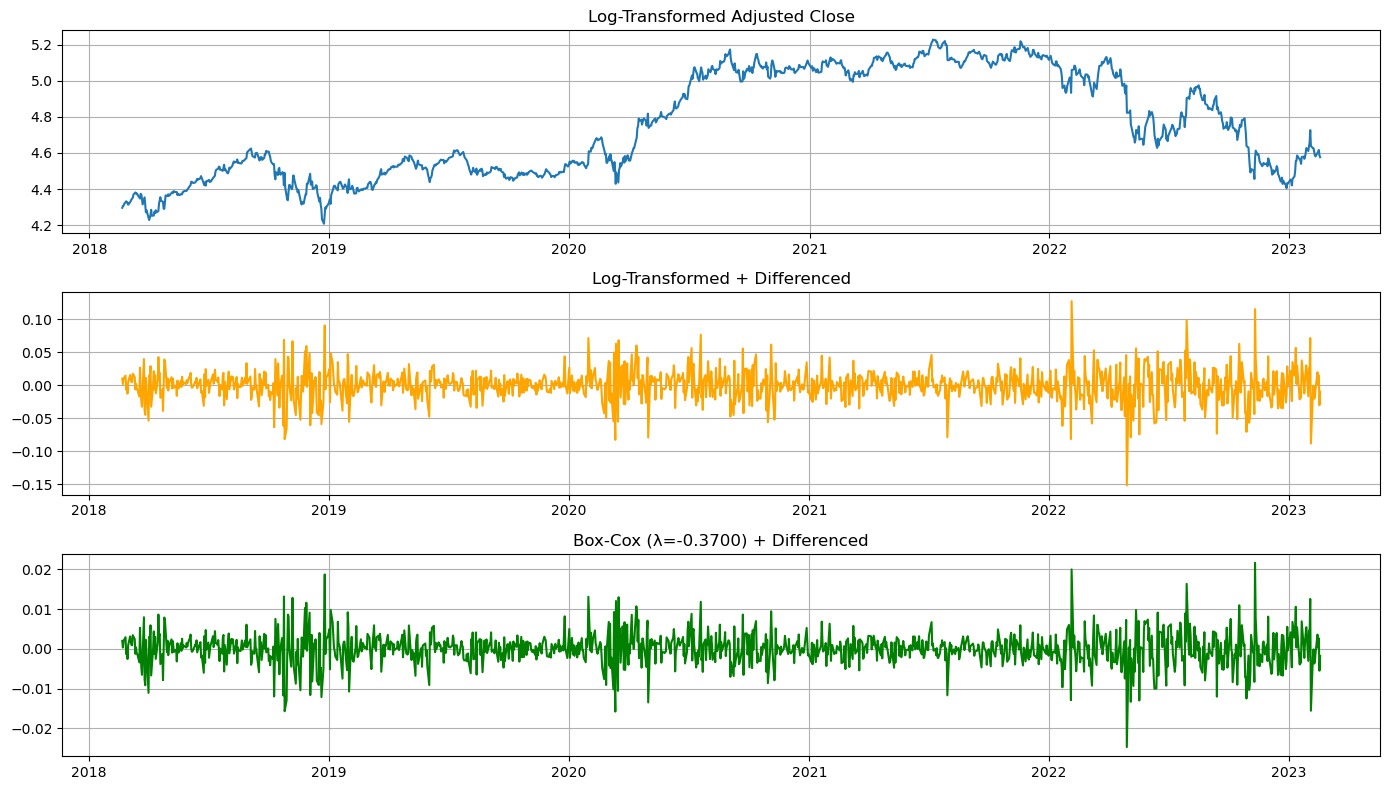

({'ADF Statistic': -36.63983281274942, 'p-value': 0.0, 'Stationary': True},
 {'ADF Statistic': -13.82965234250237,
  'p-value': 7.634281511484208e-26,
  'Stationary': True,
  'Lambda': -0.36999985006271})

In [28]:
from scipy.stats import boxcox

# Task 5: Transformations

# 1. Log transformation
amzn_data['Log Price'] = np.log(amzn_data['Adj Close'])

# 2. Differencing of log-transformed series
amzn_data['Log Diff'] = amzn_data['Log Price'].diff()

# 3. Box-Cox transformation (requires strictly positive values)
amzn_data['BoxCox Price'], lambda_bc = boxcox(amzn_data['Adj Close'])

# Differencing of Box-Cox transformed series
amzn_data['BoxCox Diff'] = pd.Series(amzn_data['BoxCox Price']).diff()

# Drop NaNs before plotting
log_diff = amzn_data['Log Diff'].dropna()
boxcox_diff = amzn_data['BoxCox Diff'].dropna()

# Plot all transformed series
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
plt.plot(amzn_data['Log Price'], label='Log Price')
plt.title("Log-Transformed Adjusted Close")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(log_diff, label='Log Differenced', color='orange')
plt.title("Log-Transformed + Differenced")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(boxcox_diff, label='Box-Cox Differenced', color='green')
plt.title(f"Box-Cox (λ={lambda_bc:.4f}) + Differenced")
plt.grid(True)

plt.tight_layout()
plt.show()

# ADF on log-diff and boxcox-diff
adf_log_diff = adfuller(log_diff)
adf_boxcox_diff = adfuller(boxcox_diff)

adf_log_diff_result = {
    'ADF Statistic': adf_log_diff[0],
    'p-value': adf_log_diff[1],
    'Stationary': adf_log_diff[1] < 0.05
}

adf_boxcox_diff_result = {
    'ADF Statistic': adf_boxcox_diff[0],
    'p-value': adf_boxcox_diff[1],
    'Stationary': adf_boxcox_diff[1] < 0.05,
    'Lambda': lambda_bc
}

adf_log_diff_result, adf_boxcox_diff_result


In [31]:
from statsmodels.tsa.arima.model import ARIMA

def find_best_arima(series, max_p=8, max_q=8, d=1):
    best_aic = float('inf')
    best_order = None
    aic_scores = []

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, d, q))
                result = model.fit()
                aic = result.aic
                aic_scores.append((p, d, q, aic))
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue

    aic_scores.sort(key=lambda x: x[3])  # sort by AIC
    return best_order, best_aic, aic_scores

# Example usage:
best_order, best_aic, all_results = find_best_arima(amzn_data['Log Price'], max_p=8, max_q=8, d=1)


In [32]:
for item in all_results[:5]:
    print(f"ARIMA{item[:3]} AIC={item[3]:.2f}")


ARIMA(0, 1, 0) AIC=-5940.34
ARIMA(1, 1, 0) AIC=-5939.76
ARIMA(0, 1, 1) AIC=-5939.67
ARIMA(2, 1, 0) AIC=-5939.32
ARIMA(0, 1, 2) AIC=-5939.12


In [33]:
import pmdarima as pm

# Run auto_arima on the original series (not differenced manually)
auto_model = pm.auto_arima(amzn_data['Adj Close'],
                           start_p=0, start_q=0,
                           max_p=8, max_q=8,
                           d=1,                # force 1st differencing
                           seasonal=False,
                           stepwise=True,
                           trace=True,
                           suppress_warnings=True,
                           error_action='ignore')

# Show summary
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6132.580, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6133.913, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6133.946, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6130.639, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6133.629, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.448 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3064.319
Date:                Fri, 11 Apr 2025   AIC                           6130.639
Time:                        00:48:06   BIC                           6135.776
Sample:                             0   HQIC                          6132.569
                               - 1259                                       

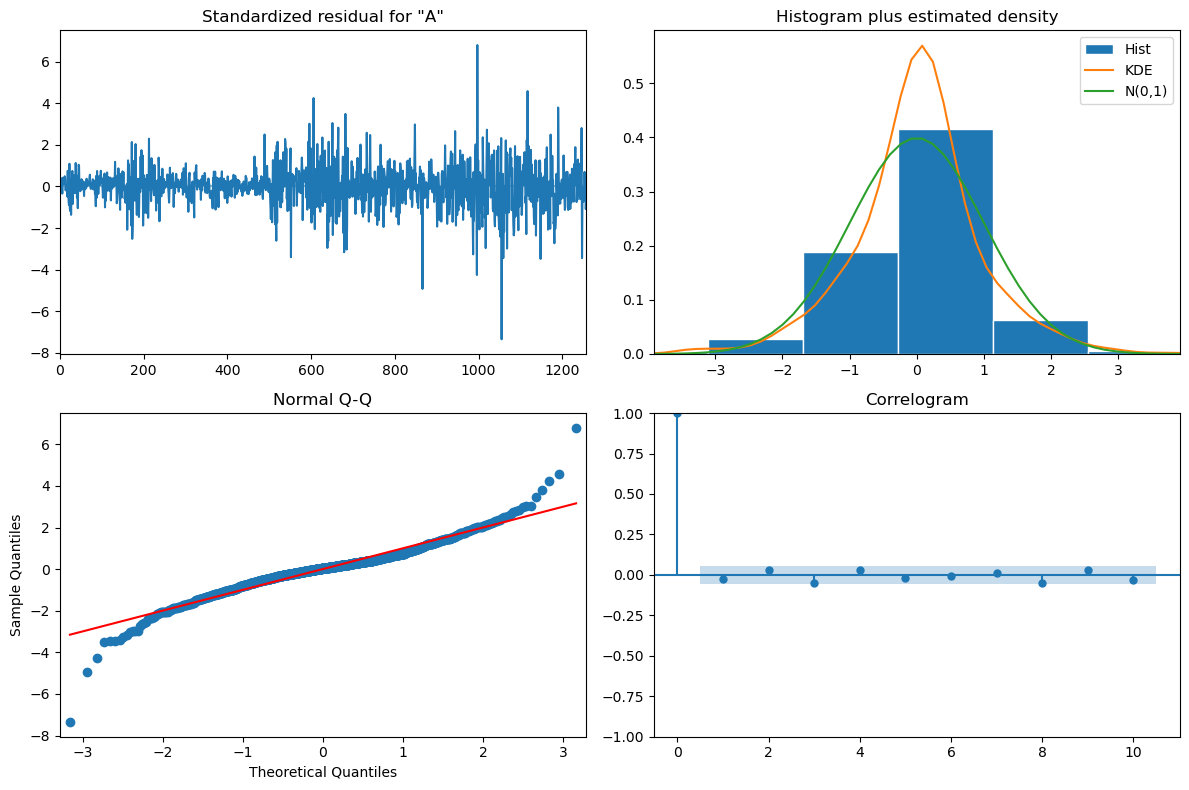

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                 1259
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3064.319
Date:                Fri, 11 Apr 2025   AIC                           6130.639
Time:                        00:50:18   BIC                           6135.776
Sample:                             0   HQIC                          6132.569
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.6435      0.155     49.306      0.000       7.340       7.947
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):              1730.44
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               4.59   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# Task 7: Fit the ARIMA(0,1,0) model to the original price series and inspect summary + diagnostics
from statsmodels.tsa.arima.model import ARIMA

# Fit model
model = ARIMA(amzn_data['Adj Close'], order=(0, 1, 0))
model_fit = model.fit()

# Display summary
summary = model_fit.summary()

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

summary


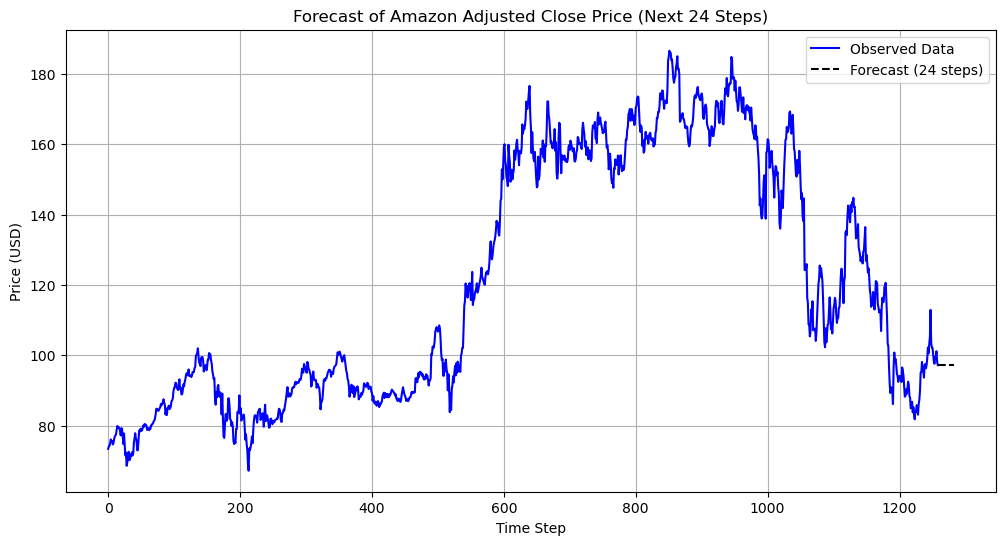

In [35]:
# Task 8: Forecast the next 24 time steps (months or trading days)
n_forecast = 24

# Forecast 24 steps ahead
forecast_result = model_fit.get_forecast(steps=n_forecast)

# Create time index for plotting
predicted_mean = forecast_result.predicted_mean
forecast_index = np.arange(len(amzn_data['Adj Close']) + n_forecast)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(amzn_data['Adj Close'].values, label='Observed Data', color='blue')
plt.plot(forecast_index[-n_forecast:], predicted_mean, 'k--', label='Forecast (24 steps)')
plt.title("Forecast of Amazon Adjusted Close Price (Next 24 Steps)")
plt.xlabel("Time Step")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'forecast_dates' is not defined

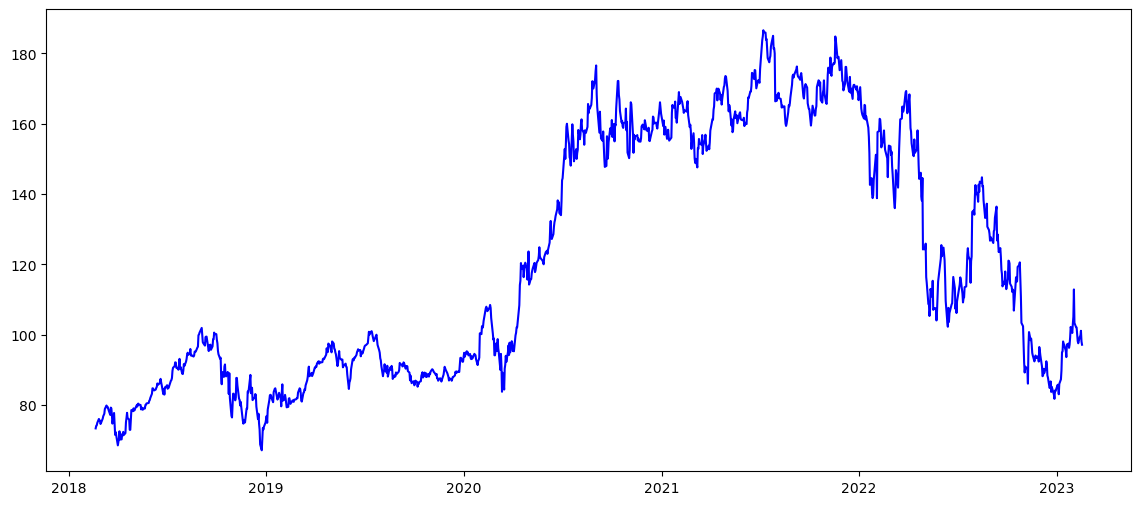

In [36]:
# Convert forecast outputs to float and reindex with forecast_dates
forecast_mean_vals = forecast_mean.values.astype('float64')
lower_ci_vals = forecast_ci.iloc[:, 0].values.astype('float64')
upper_ci_vals = forecast_ci.iloc[:, 1].values.astype('float64')

# Plot with datetime index
plt.figure(figsize=(14, 6))
plt.plot(amzn_data['Adj Close'], label='Observed', color='blue')
plt.plot(forecast_dates, forecast_mean_vals, 'k--', label='Forecast')
plt.fill_between(forecast_dates,
                 lower_ci_vals,
                 upper_ci_vals,
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("Amazon Adjusted Close Price Forecast (Next 24 Business Days)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


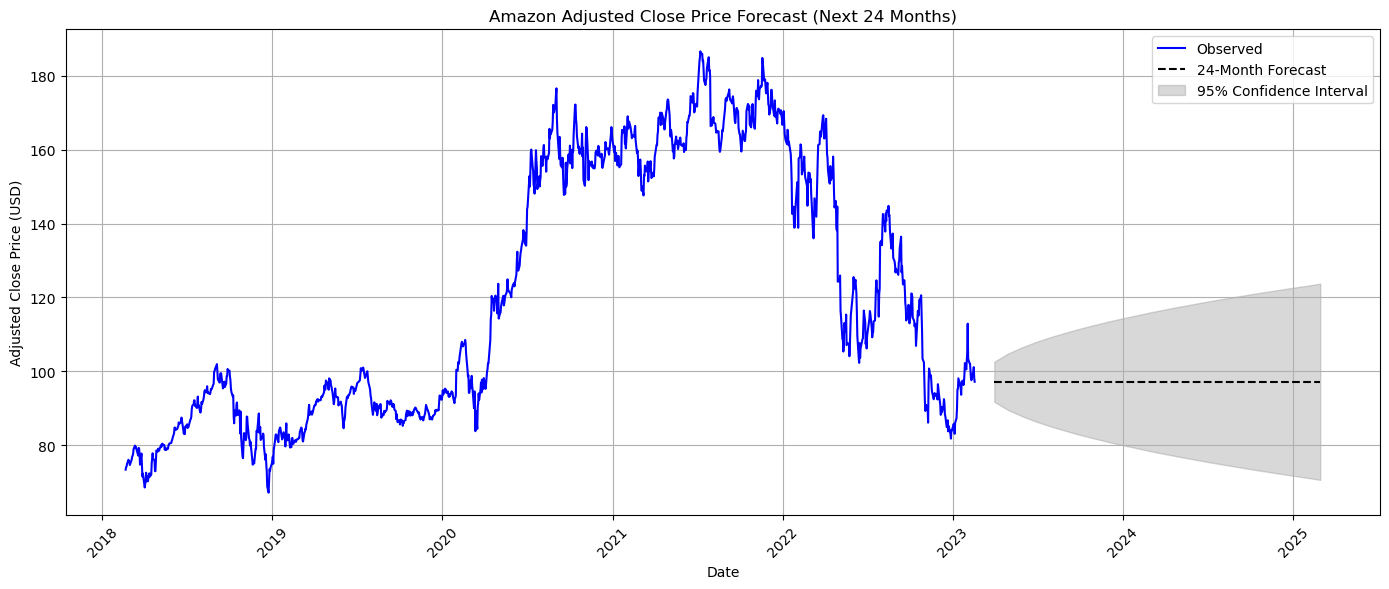

In [37]:
# Task 9 (Corrected): Forecast next 24 months instead of trading days

# Get forecast for 24 months
n_forecast_months = 24
monthly_forecast = model_fit.get_forecast(steps=n_forecast_months)
monthly_mean = monthly_forecast.predicted_mean
monthly_ci = monthly_forecast.conf_int()

# Create monthly datetime index starting from last date
last_date = amzn_data.index[-1]
monthly_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=n_forecast_months, freq='M')

# Convert forecast values to float
monthly_mean_vals = monthly_mean.values.astype('float64')
monthly_lower = monthly_ci.iloc[:, 0].values.astype('float64')
monthly_upper = monthly_ci.iloc[:, 1].values.astype('float64')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(amzn_data['Adj Close'], label='Observed', color='blue')
plt.plot(monthly_dates, monthly_mean_vals, 'k--', label='24-Month Forecast')
plt.fill_between(monthly_dates,
                 monthly_lower,
                 monthly_upper,
                 color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title("Amazon Adjusted Close Price Forecast (Next 24 Months)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
# Task 9 (Re-confirmation): Use get_forecast() and extract predicted mean and confidence intervals
predictions_int = model_fit.get_forecast(steps=24)

# Extract mean forecast and confidence intervals
forecast_mean_vals = predictions_int.predicted_mean
forecast_ci = predictions_int.conf_int()

forecast_mean_vals.head(), forecast_ci.head()


(1259    97.199997
 1260    97.199997
 1261    97.199997
 1262    97.199997
 1263    97.199997
 Name: predicted_mean, dtype: float64,
       lower Adj Close  upper Adj Close
 1259        91.781320       102.618674
 1260        89.536830       104.863164
 1261        87.814573       106.585421
 1262        86.362643       108.037351
 1263        85.083466       109.316528)

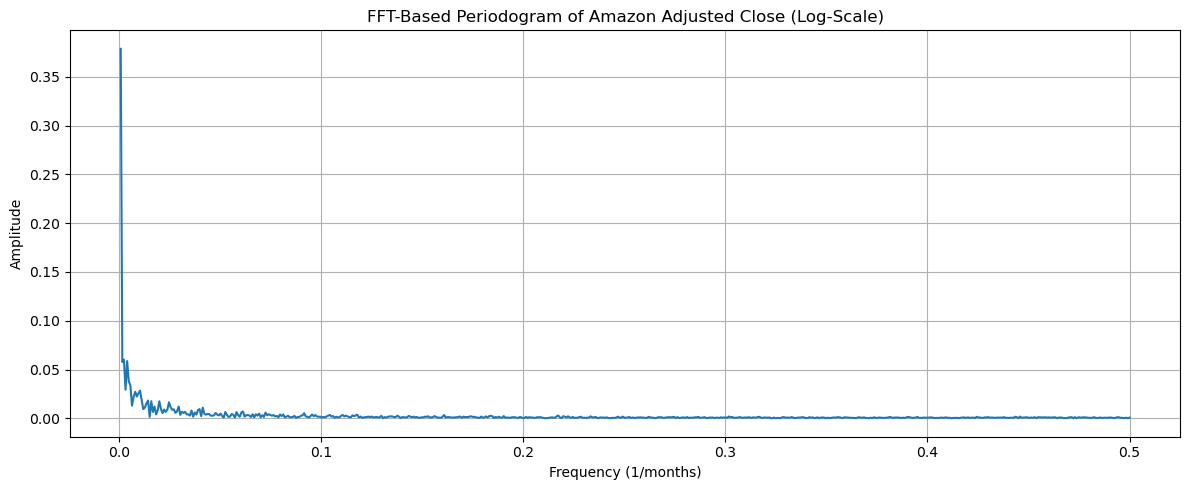

In [40]:
from scipy.fftpack import fft

# Task 10: FFT-based periodogram for Amazon using Unit 4 code style

# Use the log-transformed Adjusted Close prices (stationary basis)
log_amzn = np.log(amzn_data['Adj Close'].dropna().values)

# Number of sample points
N = len(log_amzn)

# Assume uniform monthly spacing
T = 1.0  # one step per month (unit time)

# Compute FFT
yf = fft(log_amzn)
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)

# Compute power spectrum (modulus), discard zero frequency
periodogram = 2.0 / N * np.abs(yf[1:N // 2])

# Plot result
plt.figure(figsize=(12, 5))
plt.plot(xf[1:], periodogram, linewidth=1.5)
plt.title("FFT-Based Periodogram of Amazon Adjusted Close (Log-Scale)")
plt.xlabel("Frequency (1/months)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
from scipy.fftpack import fft
yf = fft(np.log(amzn_data['Adj Close'].dropna().values))

xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
periodogram = 2.0 / N * np.abs(yf[1:N//2])


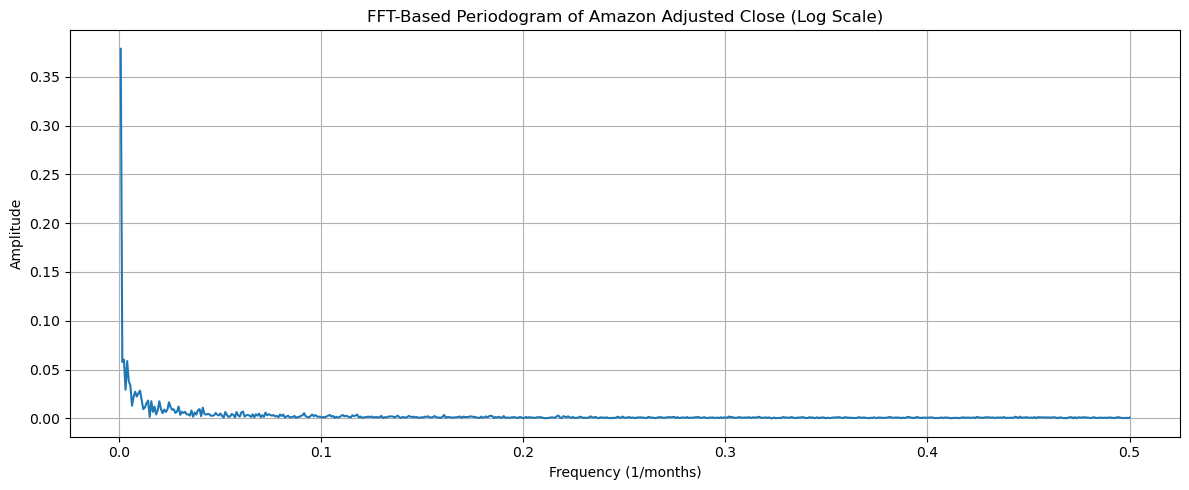

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(xf[1:], periodogram, linewidth=1.5)
plt.title("FFT-Based Periodogram of Amazon Adjusted Close (Log Scale)")
plt.xlabel("Frequency (1/months)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Step 1: Prepare and normalize log-transformed Amazon data for NN modeling
log_amzn_nn = np.log(amzn_data['Adj Close'].dropna().values).reshape(-1, 1)

# Normalize to [0, 1]
scaler_amzn = MinMaxScaler()
log_amzn_scaled = scaler_amzn.fit_transform(log_amzn_nn)

# Function to convert time series to supervised learning format
def create_lagged_dataset(series, look_back=3):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i + look_back].flatten())
        y.append(series[i + look_back][0])
    return np.array(X), np.array(y)

# Lag window
look_back = 3
X_amzn, y_amzn = create_lagged_dataset(log_amzn_scaled, look_back)

# Train/test split (80/20)
split_idx = int(len(X_amzn) * 0.8)
X_train_amzn, X_test_amzn = X_amzn[:split_idx], X_amzn[split_idx:]
y_train_amzn, y_test_amzn = y_amzn[:split_idx], y_amzn[split_idx:]

X_amzn.shape, y_amzn.shape, X_train_amzn.shape, X_test_amzn.shape


((1256, 3), (1256,), (1004, 3), (252, 3))

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Train the MLP model
mlp_amzn_model = MLPRegressor(hidden_layer_sizes=(100,),
                               activation='relu',
                               solver='adam',
                               max_iter=1000,
                               random_state=42)

mlp_amzn_model.fit(X_train_amzn, y_train_amzn)

# Step 3: Predict on test set
y_pred_scaled = mlp_amzn_model.predict(X_test_amzn)

# Inverse transform predictions and actual values
y_pred_amzn = scaler_amzn.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_true_amzn = scaler_amzn.inverse_transform(y_test_amzn.reshape(-1, 1))

# Compute RMSE
mlp_amzn_rmse = mean_squared_error(y_true_amzn, y_pred_amzn, squared=False)
mlp_amzn_rmse


0.04171264608332418

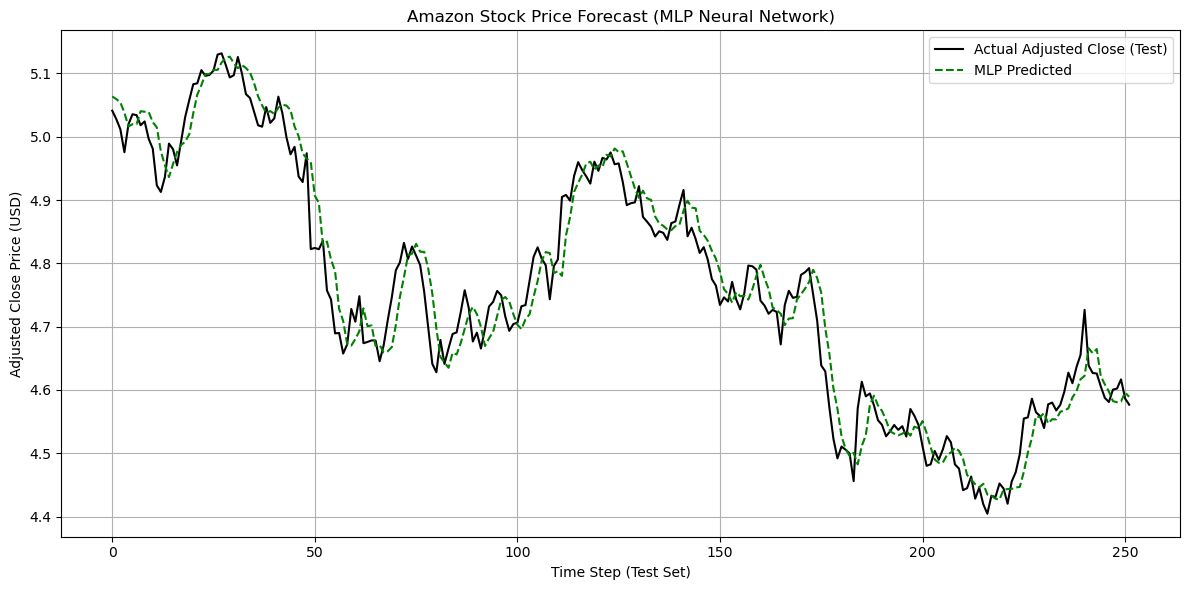

In [47]:
# Step 4: Plot actual vs predicted Amazon values
plt.figure(figsize=(12, 6))
plt.plot(y_true_amzn, label='Actual Adjusted Close (Test)', color='black')
plt.plot(y_pred_amzn, label='MLP Predicted', linestyle='--', color='green')
plt.title("Amazon Stock Price Forecast (MLP Neural Network)")
plt.xlabel("Time Step (Test Set)")
plt.ylabel("Adjusted Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


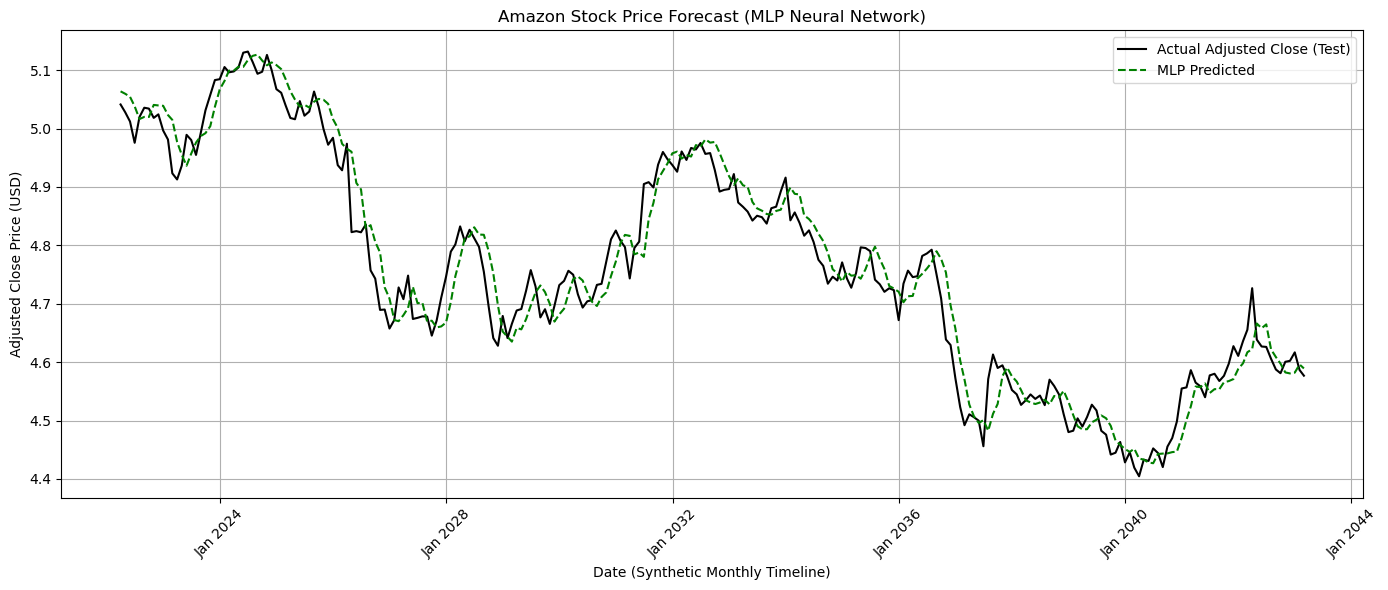

In [48]:
# Improve the x-axis labels for interpretability (e.g., index-based or dummy date)
import matplotlib.dates as mdates

# Generate a fake timeline for test set length (monthly, for readability)
start_date = pd.to_datetime(amzn_data.index[-len(y_true_amzn) - 1]) + pd.DateOffset(months=1)
fake_dates = pd.date_range(start=start_date, periods=len(y_true_amzn), freq='M')

# Plot with readable datetime x-axis
plt.figure(figsize=(14, 6))
plt.plot(fake_dates, y_true_amzn, label='Actual Adjusted Close (Test)', color='black')
plt.plot(fake_dates, y_pred_amzn, label='MLP Predicted', linestyle='--', color='green')
plt.title("Amazon Stock Price Forecast (MLP Neural Network)")
plt.xlabel("Date (Synthetic Monthly Timeline)")
plt.ylabel("Adjusted Close Price (USD)")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
